In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(r'D:\Python\Analytics Vidhya\Loan prediction\train.csv')

In [3]:
test = pd.read_csv(r'D:\Python\Analytics Vidhya\Loan prediction\test.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.shape , test.shape

((614, 13), (367, 12))

<h1>Data cleaning and dealing with outliers

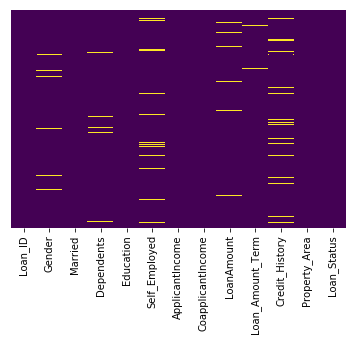

In [8]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap="viridis")

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

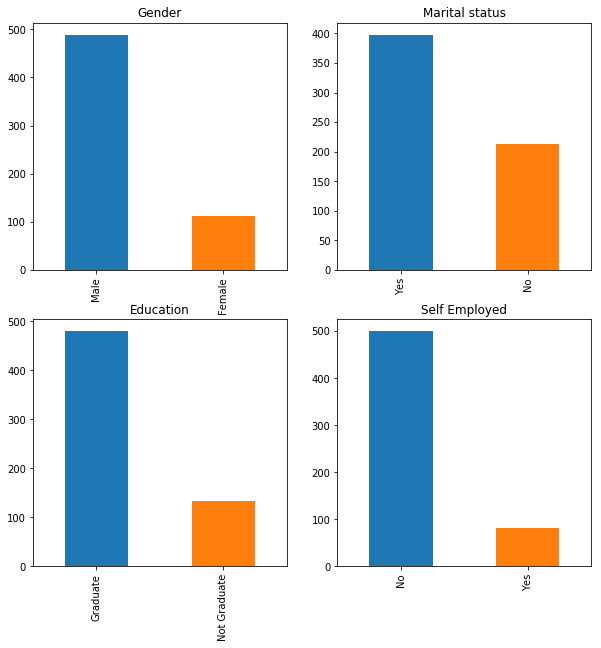

In [10]:
plt.figure()
plt.subplot(221)
train['Gender'].value_counts().plot.bar(title='Gender',figsize=(10,10))

plt.subplot(222)
train['Married'].value_counts().plot.bar(title='Marital status')

plt.subplot(223)
train['Education'].value_counts().plot.bar(title='Education')\

plt.subplot(224)
train['Self_Employed'].value_counts().plot.bar(title='Self Employed')

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

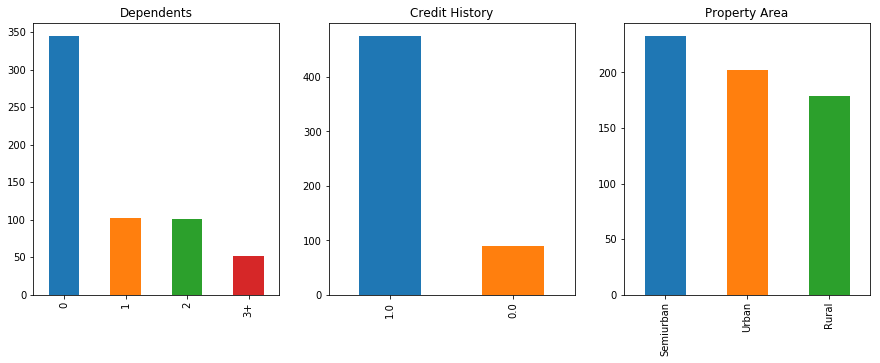

In [12]:
plt.figure()
plt.subplot(131)
train['Dependents'].value_counts().plot.bar(figsize=(15,5),title='Dependents')

plt.subplot(132)
train['Credit_History'].value_counts().plot.bar(title='Credit History')

plt.subplot(133)
train['Property_Area'].value_counts().plot.bar(title='Property Area')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


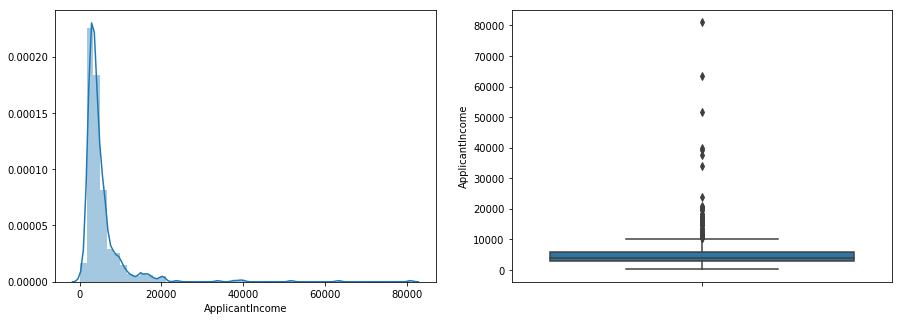

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
sns.boxplot(y='ApplicantIncome',data=train)

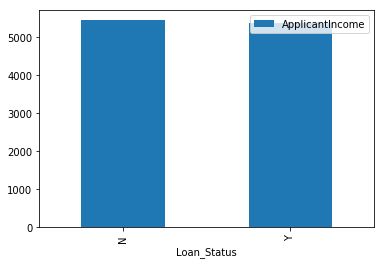

In [14]:
train.pivot_table(index='Loan_Status',values='ApplicantIncome',aggfunc='mean').plot.bar()

In [15]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

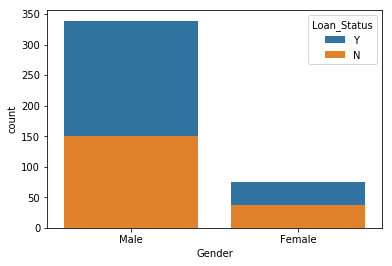

In [16]:
sns.countplot(data=train,x='Gender',hue='Loan_Status',dodge=False)

In [17]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(axis=1),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


#Data Munging

In [18]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


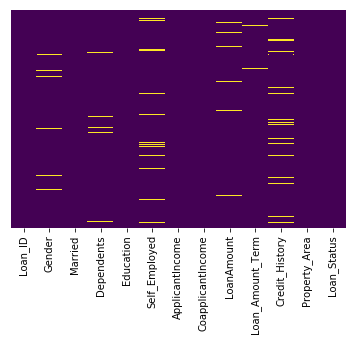

In [19]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [20]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [21]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

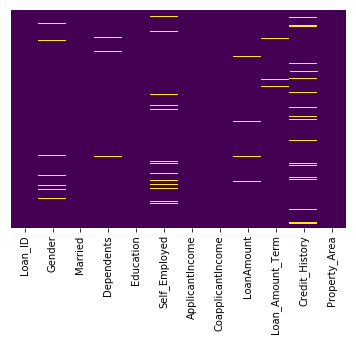

In [22]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [23]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [24]:
test.drop('Loan_ID',inplace=True,axis=1)

In [25]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [26]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


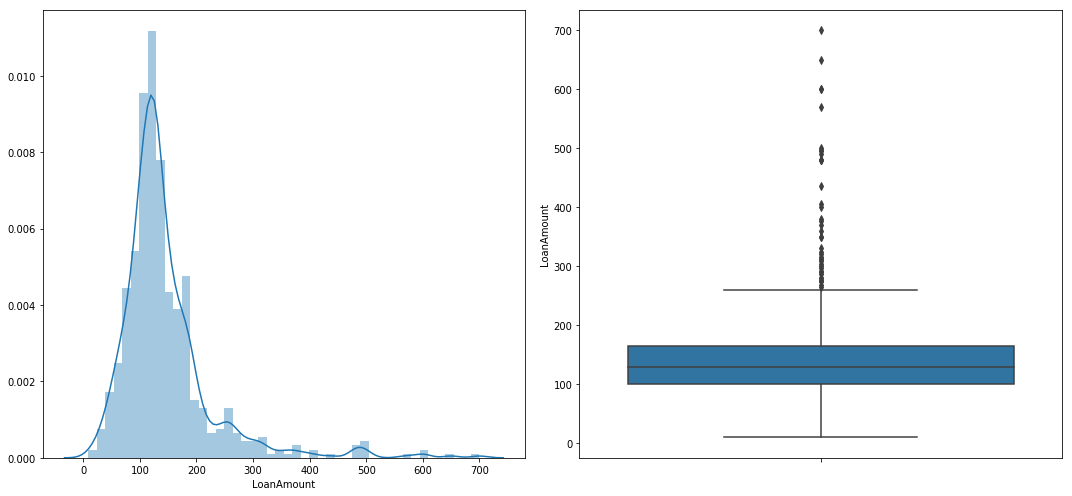

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
sns.boxplot(data=train,y='LoanAmount')

plt.tight_layout()
plt.show()

In [28]:
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


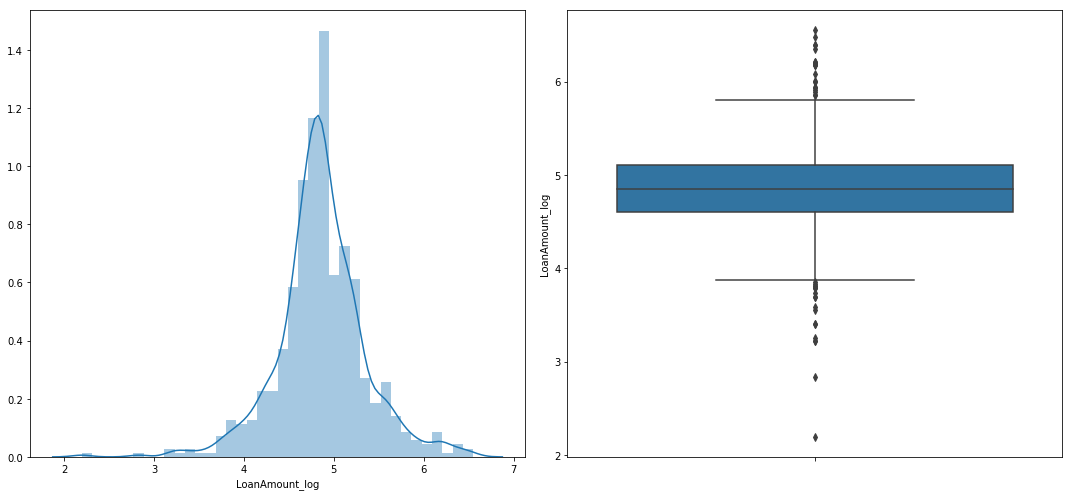

In [29]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(train['LoanAmount_log'])

plt.subplot(122)
sns.boxplot(data=train,y='LoanAmount_log')

plt.tight_layout()
plt.show()

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              611 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.2+ KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
LoanAmount_log       367 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


<h1>Starting the Machine Learning for Logistic Regression</h1>

In [32]:
test = test[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
             'CoapplicantIncome', 'LoanAmount','LoanAmount_log', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
test.drop(['LoanAmount'],axis=1,inplace=True)
test = pd.get_dummies(test,drop_first=True)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount_log,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,4.700480,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,4.836282,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,5.337538,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,4.605170,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,4.356709,360.0,1.0,1,0,0,0,0,1,0,0,1


In [33]:
train = train[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','LoanAmount_log',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]


In [34]:
X = train.drop(['Loan_ID','LoanAmount','Loan_Status'],axis=1)
y = train['Loan_Status']
X = pd.get_dummies(X,drop_first=True)
y = pd.get_dummies(y,drop_first=True)

In [35]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount_log,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,4.852030,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,4.852030,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,4.189655,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,4.787492,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,1


In [36]:
y.head()

,Y
0,1
1,0
2,1
3,1
4,1



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lm = LogisticRegression()

lm.fit(X_train,y_train)

In [42]:
from sklearn import metrics

In [45]:
def con_mat(y_test,pred):
    confusion = metrics.confusion_matrix(y_test,predict)
    TN = confusion[0][0]
    FP = confusion[0][1]
    FN = confusion[1][0]
    TP = confusion[1][1]
    specificity = TN / float(TN+FP)
    sensitivity = TP / float(TP+FN)
    return confusion,specificity,sensitivity

con, spec, sen = con_mat(y_test,pred)
con

array([[ 26,  38],
       [  2, 119]], dtype=int64)

 print(metrics.accuracy_score(yvl,predict))

predict_pro = lm.predict_proba(xvl)
predict_pro[:10]

plt.figure(figsize=(10,7))
sns.distplot(predict_pro[:,1])

In [ ]:
from sklearn import preprocessing

In [ ]:
y_bin = preprocessing.binarize(predict_pro,threshold=0.71)
y_bin = pd.DataFrame(y_bin,columns=['N','Loan_Status'])
y_bin.drop('N',axis=1,inplace=True)
y_bin.shape

In [ ]:
confusion = metrics.confusion_matrix(y_test,y_bin)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
specificity = TN / float(TN+FP)
print(specificity)

In [ ]:
print(metrics.confusion_matrix(y_test,y_bin))

In [ ]:
print(metrics.accuracy_score(y_test,y_bin))

In [ ]:
print(metrics.accuracy_score(y_test,predict))

<h1>Predicting loan status with threshold = 0.71

In [ ]:
#from sklearn.model_selection import cross_val_score

In [ ]:
#accuracy = cross_val_score(lm,X,y,cv=10,scoring='accuracy')
#accuracy.mean()

In [ ]:
#from sklearn.model_selection import StratifiedKFold
#from sklearn import metrics

In [ ]:
#y['Loan_Status'] = y['Y']
#y.drop('Y',axis=1,inplace=True)
#y.head()

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y.loc[train_index], y.loc[test_index]
    lm.fit(xtr,ytr)
    pred = lm.predict(xvl)
    score = metrics.accuracy_score(yvl,pred)
    print('accuracy : ',score)
    print(pred)

In [ ]:
test.head()

In [ ]:
#pred_test = lm.predict(test)
pred_test_pro=lm.predict_proba(test)
pred_test_pro

In [ ]:
test_bin = preprocessing.binarize(pred_test_pro,threshold=0.71)
test_bin = pd.DataFrame(test_bin,columns=['N','Loan_Status'])
test_bin.drop('N',axis=1,inplace=True)
test_bin.head()

In [ ]:
test_bin['Loan_Status'].value_counts()

In [ ]:
submission = pd.DataFrame()
submission

In [ ]:
submission['Loan_Status'] = test_bin['Loan_Status']
submission['Loan_ID'] = test_original['Loan_ID']
submission

In [ ]:
test.info()

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.columns

In [ ]:
submission = submission[['Loan_ID','Loan_Status']]
submission.head()

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(r'D:\Python\Analytics Vidhya\Loan prediction\submission.csv',index=False)

In [ ]:
print('Specificity:',specificity)
print('Accuracy:',metrics.accuracy_score(y_test,y_bin))